# Study Point
- matplot의 line그래프를 대상으로 챠트의 각 요소를 익힌다
- bar, pie, histogram, scatter 그래프를 그려본다
- subplot을 이용해서 여러 개의 그래프를 한장에 그려본다
- pandas 패키지의 DataFrame을 그래프로 그려본다
- seaborn패키지를 이용해서 좀 더 다양한 그래프를 그려본다
- 지도정보를 이용해서 지도에 시각화를 해 본다

참고자료 : http://pandas.pydata.org/pandas-docs/stable/visualization.html

In [1]:
import matplotlib.pylab as plt
plt.rcParams["figure.figsize"] = (20,4)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.color'] = 'r'
plt.rcParams['axes.grid'] = True 

In [2]:
%matplotlib inline

In [3]:
#Configure Defaults
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import warnings
warnings.filterwarnings('ignore')

from IPython.display import Image
width = 700

get_ipython().run_line_magic('matplotlib', 'inline')
plt.rcParams['font.family']='Malgun Gothic'

# Basic
import numpy as np
import pandas as pd
import missingno as msno

value counts
- A. normalize = True: if you want to check the frequency instead of counts.
- B. dropna = False: if you also want to include missing values in the stats.
- C. df['c'].value_counts().reset_index(): if you want to convert the stats table into a pandas dataframe and manipulate it
- D. df['c'].value_counts().reset_index().sort_values(by='index') : show the stats sorted by distinct values in column ‘c’ instead of counts. (Update 2019.4.18 — for D. above, Hao Yang points out a simpler way without .reset_index(): df['c'].value_counts().sort_index())

## matplotlib - Line

In [4]:
a = np.arange(1,10)
b = a**2
c = (10-a)**2
d = a + b + c

In [5]:
data = np.vstack((a,b,c,d))
pd.DataFrame(data.T, columns=['a', 'b', 'c', 'd'])

,a,b,c,d
0,1,1,81,83
1,2,4,64,70
2,3,9,49,61
3,4,16,36,56
4,5,25,25,55
5,6,36,16,58
6,7,49,9,65
7,8,64,4,76
8,9,81,1,91


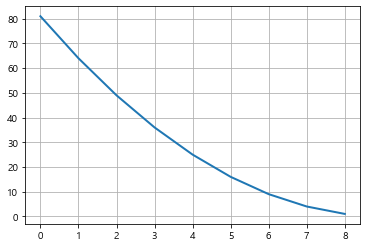

In [6]:
plt.plot(c)

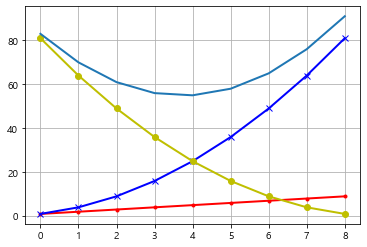

In [7]:
plt.plot(a,'r.-', b, 'bx-', c, 'yo-',d)

## sub_plot

Text(0.5, 0, 'x 축')

Text(0, 0.5, 'y 축')

Text(0.5, 1.0, '단순한 기본 그래프')

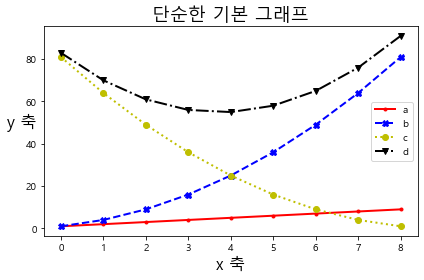

In [10]:
fig, ax = plt.subplots()
ax.plot(a, 'r.-', label='a')
ax.plot(b, 'bX--', label='b')
ax.plot(c, 'yo:', label='c')
ax.plot(d, 'kv-.', label='d')
ax.set_xlabel('x 축', fontsize=16)
ax.set_ylabel('y 축', fontsize=16, rotation='360')
ax.set_title('단순한 기본 그래프', fontsize=18)
ax.grid()
ax.legend()

fig.tight_layout()
plt.show()

<BarContainer object of 9 artists>

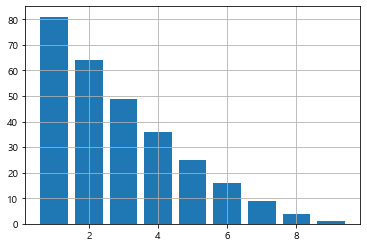

In [11]:
plt.bar(a, c)

<BarContainer object of 9 artists>

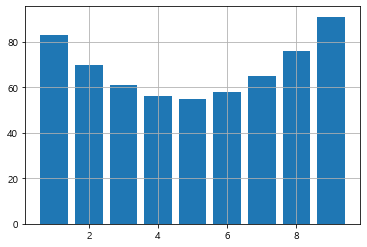

In [12]:
plt.bar(a, d)

In [13]:
plt.bar(a, c, bar_width, label='y=x**2')
plt.bar(a+bar_width, d, bar_width, label='y=81-x**2')
plt.legend()
plt.show()

NameError: name 'bar_width' is not defined

Text(0.5, 1.0, 'math.cos()')

Text(0.5, 0, 'X = -2*pie ~ +2**pie')

Text(0, 0.5, 'Y = cosine(X)')

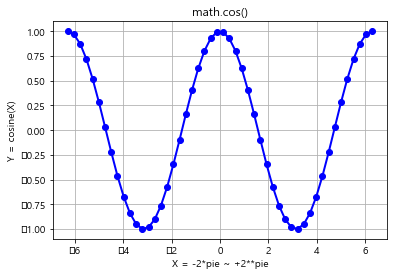

In [14]:
import math
in_array = np.linspace(-(2 * np.pi), 2 * np.pi, 50) 
out_array = [] 

for i in range(len(in_array)): 
    out_array.append(math.cos(in_array[i])) 
    i += 1
  
plt.plot(in_array, out_array, color = 'blue', marker = "o")  
plt.title("math.cos()")  
plt.xlabel("X = -2*pie ~ +2**pie")  
plt.ylabel("Y = cosine(X)")  
plt.show()  

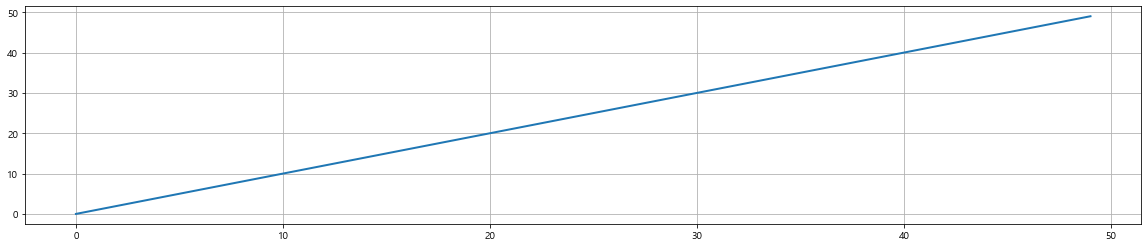

In [15]:
import math
plt.rcParams["figure.figsize"] = (20,4)

a = np.arange(0, 50); b = in_array; c = out_array; d = a+b+c

plt.plot(a)

Text(0.5, 0, 'X축')

Text(0, 0.5, 'y축')

Text(0.5, 1.0, 'Simple Graph')

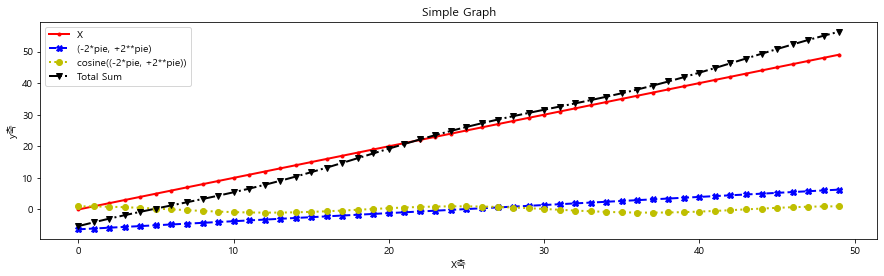

In [16]:
plt.rcParams["figure.figsize"] = (15,4)
fix, ax = plt.subplots()
ax.plot(a, 'r.-', label='X')
ax.plot(b, 'bX--', label='(-2*pie, +2**pie)')
ax.plot(c, 'yo:', label='cosine((-2*pie, +2**pie))')
ax.plot(d, 'kv-.', label='Total Sum')
ax.set_xlabel('X축')
ax.set_ylabel('y축')
ax.set_title('Simple Graph')
ax.grid()
ax.legend()

plt.show()

### matplotlib 참고
https://matplotlib.org/3.1.0/index.html

<BarContainer object of 50 artists>

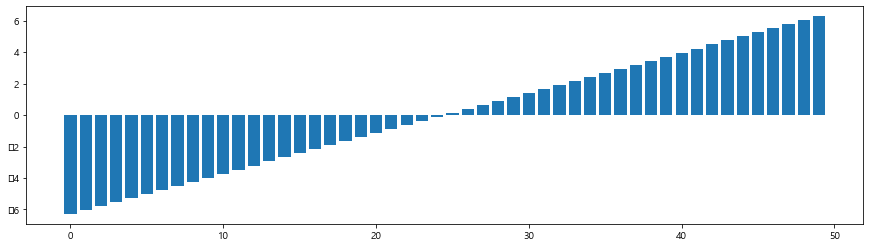

In [89]:
plt.bar(a, b)

<BarContainer object of 50 artists>

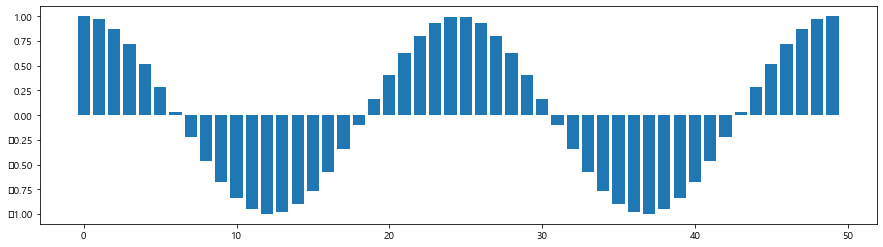

In [90]:
plt.bar(a, c)

<BarContainer object of 50 artists>

<BarContainer object of 50 artists>

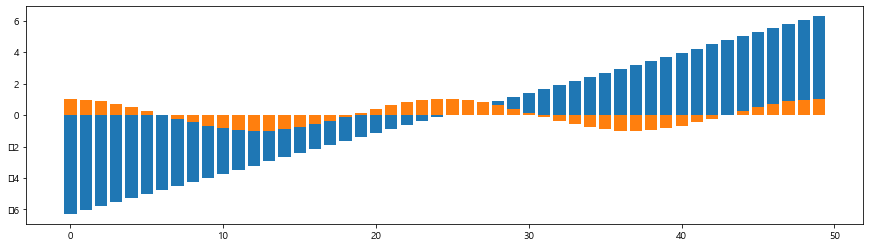

In [91]:
plt.bar(a, b)
plt.bar(a, c)

<BarContainer object of 25 artists>

<BarContainer object of 25 artists>

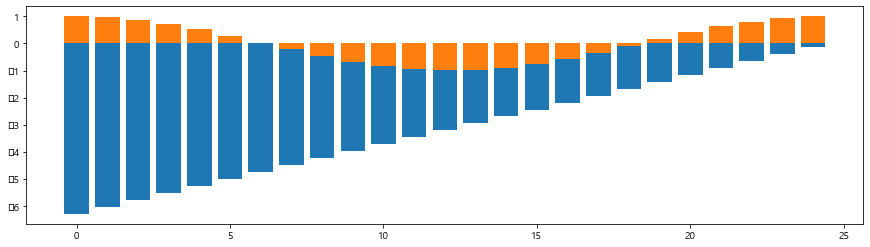

In [92]:
plt.bar(a[0:25], b[0:25])
plt.bar(a[0:25], c[0:25])

## legend

<BarContainer object of 50 artists>

<BarContainer object of 50 artists>

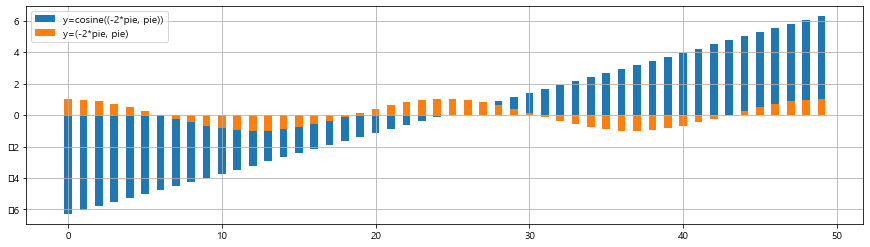

In [18]:
bar_width = 0.5
plt.bar(a, b, bar_width, label='y=cosine((-2*pie, pie))')
plt.bar(a, c, bar_width, label='y=(-2*pie, pie)')
plt.legend()
plt.show()

## matplotlib - Scatter

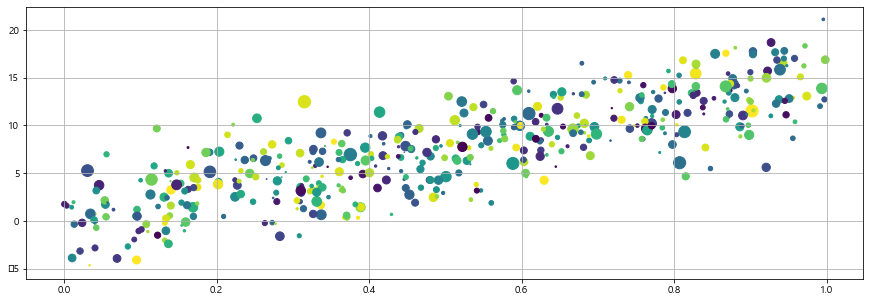

In [19]:
plt.rcParams["figure.figsize"] = (15,5)
np.random.seed(12)
N=1000
colors = np.random.rand(N)
areas = 50*np.random.randn(N)
X = np.random.rand(N)
y= 15*X + 3*np.random.randn(N)

plt.scatter(X,y, s= areas, c=colors)
plt.show()

(array([[12., 29., 26.,  7.,  1.,  1.,  0.,  0.,  0.,  0.],
        [ 9., 25., 35., 31., 13.,  4.,  0.,  0.,  0.,  0.],
        [ 1.,  6., 26., 42., 21.,  9.,  0.,  0.,  0.,  0.],
        [ 0.,  7., 31., 39., 33., 12.,  6.,  0.,  0.,  0.],
        [ 0.,  1.,  7., 25., 35., 21.,  7.,  0.,  1.,  0.],
        [ 0.,  0.,  2., 13., 25., 37., 15.,  7.,  0.,  0.],
        [ 0.,  0.,  1.,  6., 19., 39., 31.,  8.,  1.,  0.],
        [ 0.,  1.,  0.,  1.,  7., 33., 29., 23.,  6.,  0.],
        [ 0.,  0.,  0.,  3.,  4., 18., 29., 29.,  9.,  1.],
        [ 0.,  0.,  0.,  0.,  2.,  5., 25., 18., 23.,  7.]]),
 array([4.58349557e-04, 1.00243808e-01, 2.00029266e-01, 2.99814724e-01,
        3.99600182e-01, 4.99385640e-01, 5.99171098e-01, 6.98956557e-01,
        7.98742015e-01, 8.98527473e-01, 9.98312931e-01]),
 array([-4.75622893, -2.1698173 ,  0.41659433,  3.00300597,  5.5894176 ,
         8.17582923, 10.76224086, 13.3486525 , 15.93506413, 18.52147576,
        21.10788739]),
 <matplotlib.collections.Qu

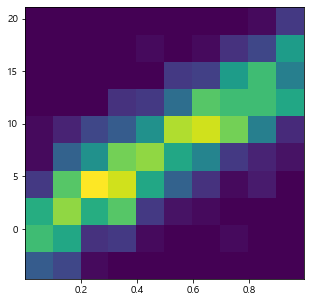

In [20]:
plt.rcParams["figure.figsize"] = (5,5)
plt.hist2d(X,y)
plt.show()

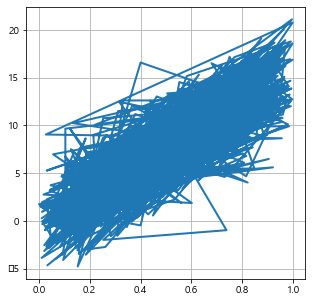

In [21]:
plt.plot(X,y)
plt.show()

In [28]:
X[0:10]
y[0:10]

array([0.83883978, 0.15957085, 0.5304236 , 0.50087394, 0.6697044 ,
       0.28582979, 0.68218388, 0.87425023, 0.03344853, 0.60299132])

array([12.57114999, -0.10864745,  9.8306463 ,  4.64416022, 11.44570586,
        5.85834007, 10.22352619, 13.65907089, -4.63658759,  7.3909903 ])

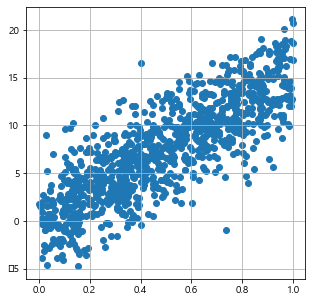

In [30]:
plt.scatter( X,y)

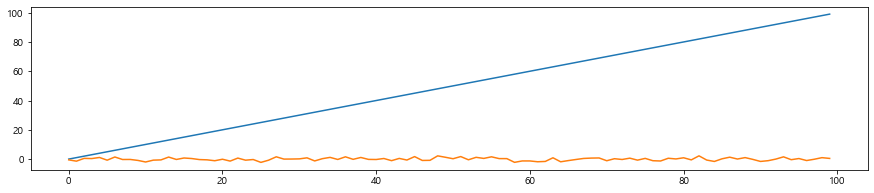

In [97]:
plt.rcParams["figure.figsize"] = (15,3)
plt.plot(np.arange(100))
plt.plot(np.random.randn(100))
plt.show()

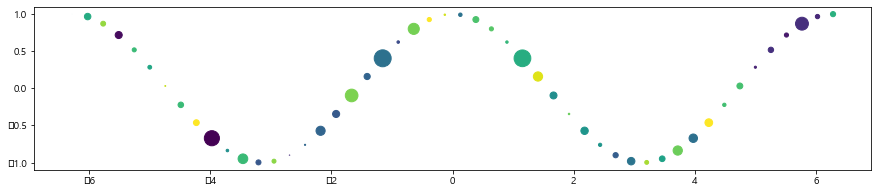

In [98]:
N=len(a)
colors = np.random.rand(N)
areas = 50*np.random.randn(N)**2

plt.scatter(b,c, s= areas, c=colors)
plt.show()

## matplotlib - Histogram

(array([  3.,  13.,  35., 134., 207., 265., 207., 103.,  25.,   8.]),
 array([-8.55339725, -5.11477911, -1.67616097,  1.76245717,  5.20107531,
         8.63969346, 12.0783116 , 15.51692974, 18.95554788, 22.39416602,
        25.83278416]),
 <BarContainer object of 10 artists>)

(array([  1.,   2.,   3.,  10.,  13.,  22.,  41.,  93., 106., 101., 129.,
        136., 109.,  98.,  71.,  32.,  16.,   9.,   3.,   5.]),
 array([-8.55339725, -6.83408818, -5.11477911, -3.39547004, -1.67616097,
         0.0431481 ,  1.76245717,  3.48176624,  5.20107531,  6.92038438,
         8.63969346, 10.35900253, 12.0783116 , 13.79762067, 15.51692974,
        17.23623881, 18.95554788, 20.67485695, 22.39416602, 24.11347509,
        25.83278416]),
 <BarContainer object of 20 artists>)

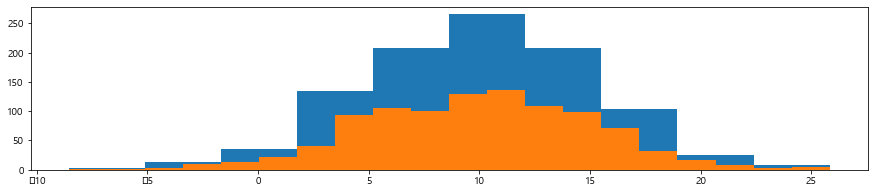

In [18]:
plt.rcParams["figure.figsize"] = (15,3)
np.random.seed(12)
N=1000
X = 10 + 5*np.random.randn(N)
plt.hist(X)
plt.hist(X, 20)
plt.show()

In [19]:
N = 2000
colors =['red', 'blue']
X1 = 10 + 5*np.random.randn(N).reshape(N,1)
X2 = -10 + 10*np.random.randn(N).reshape(N,1)
X = np.concatenate((X1, X2), axis =1)

(array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   3.,  13.,  25.,  41., 117., 190., 249., 345., 290., 254.,
         198., 141.,  70.,  39.,  13.,   9.,   3.],
        [  1.,   0.,   0.,   0.,   0.,   1.,   4.,   3.,  10.,  11.,  22.,
          30.,  42.,  57.,  75.,  84., 121., 127., 125., 156., 158., 149.,
         163., 101., 135.,  95.,  86.,  66.,  55.,  45.,  25.,  14.,  16.,
           8.,   8.,   4.,   0.,   1.,   0.,   2.]]),
 array([-50.11049238, -48.18964894, -46.26880551, -44.34796207,
        -42.42711863, -40.50627519, -38.58543175, -36.66458831,
        -34.74374487, -32.82290143, -30.90205799, -28.98121455,
        -27.06037111, -25.13952767, -23.21868423, -21.29784079,
        -19.37699735, -17.45615392, -15.53531048, -13.61446704,
        -11.6936236 ,  -9.77278016,  -7.85193672,  -5.93109328,
         -4.01024984,  -2.0894064 ,  -0.16856296,   1.752280

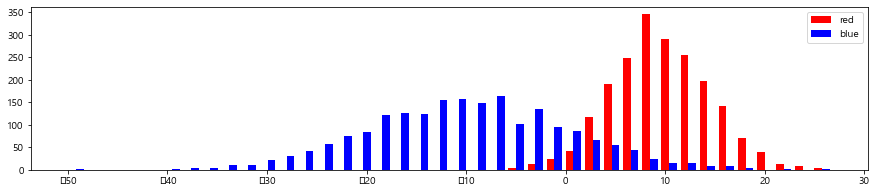

In [20]:
plt.hist(X, 40, color=colors, label=colors)
plt.legend()
plt.show()

In [21]:
X

array([[ 19.44574618, -14.42455118],
       [ 18.6691944 ,  -0.58296928],
       [  9.84852883, -29.15579392],
       ...,
       [  7.77794249,   0.9606134 ],
       [  1.01459007,  -7.8781981 ],
       [ 13.13711066, -28.82030385]])

## stacked

(array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   3.,  13.,  25.,  41., 117., 190., 249., 345., 290., 254.,
         198., 141.,  70.,  39.,  13.,   9.,   3.],
        [  1.,   0.,   0.,   0.,   0.,   1.,   4.,   3.,  10.,  11.,  22.,
          30.,  42.,  57.,  75.,  84., 121., 127., 125., 156., 158., 149.,
         163., 104., 148., 120., 127., 183., 245., 294., 370., 304., 270.,
         206., 149.,  74.,  39.,  14.,   9.,   5.]]),
 array([-50.11049238, -48.18964894, -46.26880551, -44.34796207,
        -42.42711863, -40.50627519, -38.58543175, -36.66458831,
        -34.74374487, -32.82290143, -30.90205799, -28.98121455,
        -27.06037111, -25.13952767, -23.21868423, -21.29784079,
        -19.37699735, -17.45615392, -15.53531048, -13.61446704,
        -11.6936236 ,  -9.77278016,  -7.85193672,  -5.93109328,
         -4.01024984,  -2.0894064 ,  -0.16856296,   1.752280

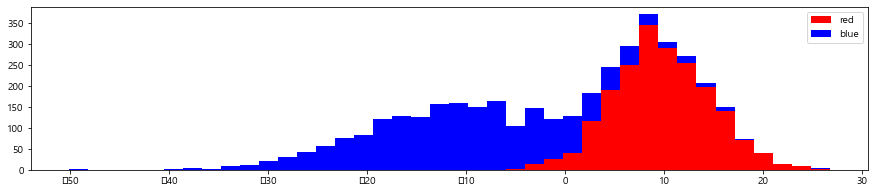

In [22]:
plt.hist(X, 40, color=colors, label=colors, stacked=True)
plt.legend()
plt.show()

## 하나에 그려보기 - 방법1

<AxesSubplot:>

(array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           3.,  38., 158., 439., 635., 452., 211.,  52.,  12.],
        [  1.,   0.,   1.,   7.,  21.,  52.,  99., 159., 248., 281., 307.,
         264., 230., 152., 100.,  39.,  24.,  12.,   1.,   2.]]),
 array([-50.11049238, -46.26880551, -42.42711863, -38.58543175,
        -34.74374487, -30.90205799, -27.06037111, -23.21868423,
        -19.37699735, -15.53531048, -11.6936236 ,  -7.85193672,
         -4.01024984,  -0.16856296,   3.67312392,   7.5148108 ,
         11.35649768,  15.19818455,  19.03987143,  22.88155831,
         26.72324519]),
 <a list of 2 BarContainer objects>)

<AxesSubplot:>

(array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           3.,  38., 158., 439., 635., 452., 211.,  52.,  12.],
        [  1.,   0.,   1.,   7.,  21.,  52.,  99., 159., 248., 281., 307.,
         267., 268., 310., 539., 674., 476., 223.,  53.,  14.]]),
 array([-50.11049238, -46.26880551, -42.42711863, -38.58543175,
        -34.74374487, -30.90205799, -27.06037111, -23.21868423,
        -19.37699735, -15.53531048, -11.6936236 ,  -7.85193672,
         -4.01024984,  -0.16856296,   3.67312392,   7.5148108 ,
         11.35649768,  15.19818455,  19.03987143,  22.88155831,
         26.72324519]),
 <a list of 2 BarContainer objects>)

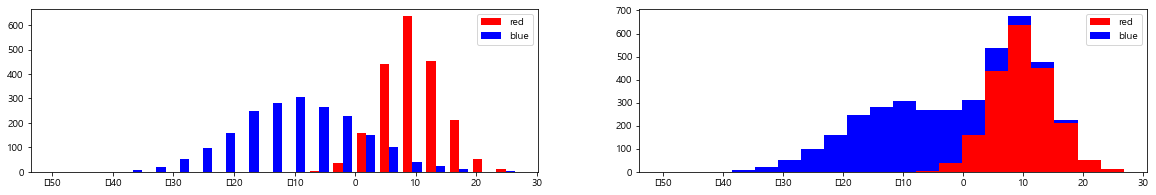

In [23]:
plt.rcParams["figure.figsize"] = (20,3)
plt.subplot(1,2,1)
plt.hist(X, 20, color=colors, label=colors)
plt.legend()

plt.subplot(1,2,2)
plt.hist(X, 20, color=colors, label=colors, stacked=True)
plt.legend()
plt.show()

## 하나에 그려보기 - 방법2

(array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           3.,  38., 158., 439., 635., 452., 211.,  52.,  12.],
        [  1.,   0.,   1.,   7.,  21.,  52.,  99., 159., 248., 281., 307.,
         264., 230., 152., 100.,  39.,  24.,  12.,   1.,   2.]]),
 array([-50.11049238, -46.26880551, -42.42711863, -38.58543175,
        -34.74374487, -30.90205799, -27.06037111, -23.21868423,
        -19.37699735, -15.53531048, -11.6936236 ,  -7.85193672,
         -4.01024984,  -0.16856296,   3.67312392,   7.5148108 ,
         11.35649768,  15.19818455,  19.03987143,  22.88155831,
         26.72324519]),
 <a list of 2 BarContainer objects>)

(array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           3.,  38., 158., 439., 635., 452., 211.,  52.,  12.],
        [  1.,   0.,   1.,   7.,  21.,  52.,  99., 159., 248., 281., 307.,
         267., 268., 310., 539., 674., 476., 223.,  53.,  14.]]),
 array([-50.11049238, -46.26880551, -42.42711863, -38.58543175,
        -34.74374487, -30.90205799, -27.06037111, -23.21868423,
        -19.37699735, -15.53531048, -11.6936236 ,  -7.85193672,
         -4.01024984,  -0.16856296,   3.67312392,   7.5148108 ,
         11.35649768,  15.19818455,  19.03987143,  22.88155831,
         26.72324519]),
 <a list of 2 BarContainer objects>)

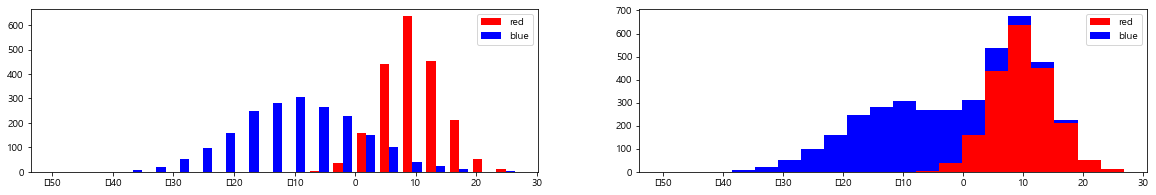

In [24]:
fig, axes = plt.subplots(nrows=1, ncols=2)
axes[0].hist(X, 20, color=colors, label=colors)
axes[0].legend()
axes[1].hist(X, 20, color=colors, label=colors, stacked=True)
axes[1].legend()
plt.show()

(array([[  0.,   0., 396., 604.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  3.,  43., 116., 212., 241., 229., 130.,  24.,   1.,   1.]]),
 array([-13.30872024,  -8.74710825,  -4.18549626,   0.37611573,
          4.93772773,   9.49933972,  14.06095171,  18.6225637 ,
         23.18417569,  27.74578768,  32.30739968]),
 <a list of 2 BarContainer objects>)

(array([[  0.,   0.,   0.,   0.,   0., 396., 604.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  1.,   2.,  13.,  30.,  36., 476., 703., 113., 113., 128., 121.,
         108.,  79.,  51.,  20.,   4.,   1.,   0.,   0.,   1.]]),
 array([-13.30872024, -11.02791425,  -8.74710825,  -6.46630225,
         -4.18549626,  -1.90469026,   0.37611573,   2.65692173,
          4.93772773,   7.21853372,   9.49933972,  11.78014571,
         14.06095171,  16.3417577 ,  18.6225637 ,  20.9033697 ,
         23.18417569,  25.46498169,  27.74578768,  30.02659368,
         32.30739968]),
 <a list of 2 BarContainer objects>)

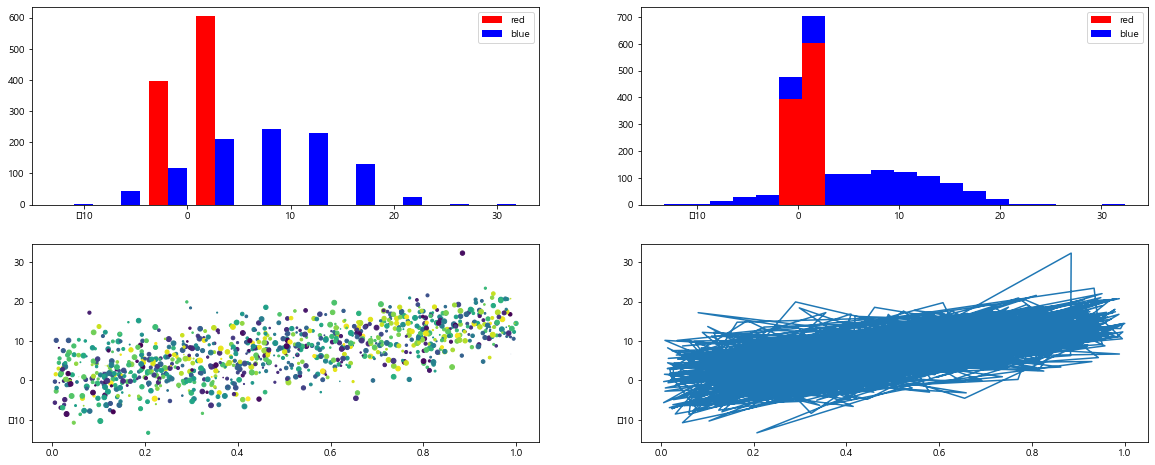

In [25]:
plt.rcParams["figure.figsize"] = (20,8)
N=1000
x1= np.random.rand(N).reshape(N,1)
x2= 15*x1 + 5*np.random.randn(N).reshape(N,1)
x = np.concatenate((x1, x2), axis=1)

area = 25*np.random.rand(N)
color = np.random.rand(N)
colors = ['red', 'blue']

fig, axes = plt.subplots(nrows=2, ncols=2)
axes[0,0].hist(x, 10, color=colors, label=colors)
axes[0,0].legend()
axes[0,1].hist(x, 20, color=colors, label=colors, stacked=True)
axes[0,1].legend()

axes[1,0].scatter(x[:,0], x[:,1], s= area, c=color)
axes[1,1].plot(x[:,0], x[:,1])
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x21d47703fd0>,
 'caps': [<matplotlib.lines.Line2D at 0x21d477106d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x21d47703c70>,
 'medians': [<matplotlib.lines.Line2D at 0x21d47710d90>,
 'fliers': [<matplotlib.lines.Line2D at 0x21d4771c130>,
 'means': []}

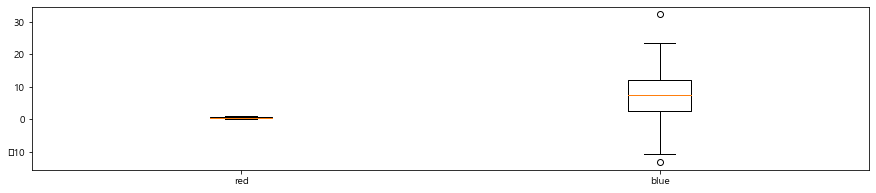

In [26]:
plt.rcParams["figure.figsize"] = (15,3)
plt.boxplot(x, labels=colors)
plt.show()

## pandas plot -line

count    1000.000000
mean        0.038525
std         1.003954
min        -3.181936
25%        -0.643297
50%         0.023873
75%         0.682558
max         2.976169
dtype: float64

<AxesSubplot:>

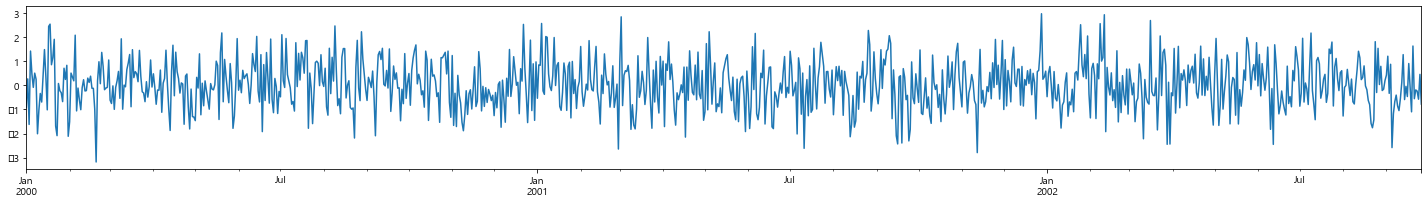

In [27]:
plt.rcParams["figure.figsize"] = (25,3)

N = 1000
ts = pd.Series(np.random.randn(N), index=pd.date_range('1/1/2000', periods =N))
ts.describe()
ts.plot()

count    1000.000000
mean       21.995579
std        12.385770
min        -3.852716
25%        14.369955
50%        23.713827
75%        31.137082
max        46.560978
dtype: float64

<AxesSubplot:>

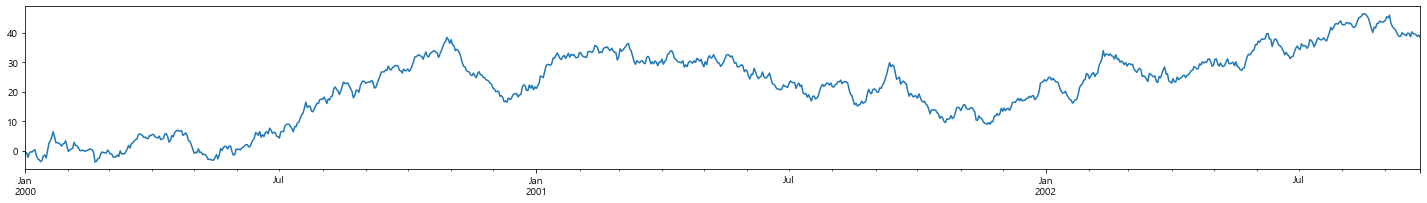

In [28]:
ts=ts.cumsum()
ts.describe()
ts.plot()

In [29]:
ts.index[0:4]

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04'], dtype='datetime64[ns]', freq='D')

,A,B,C,D
2000-01-01,-1.673753,0.479104,-0.498256,-0.261691
2000-01-02,1.609344,-0.706143,-1.883509,-0.390317
2000-01-03,0.091577,1.872867,-1.736266,-0.513733


<Figure size 1800x216 with 0 Axes>

<AxesSubplot:>

,A,B,C,D
2000-01-01,-1.673753,0.479104,-0.498256,-0.261691
2000-01-02,-0.064408,-0.227039,-2.381764,-0.652008
2000-01-03,0.027169,1.645828,-4.118030,-1.165741


<Figure size 1800x216 with 0 Axes>

<AxesSubplot:>

<Figure size 1800x216 with 0 Axes>

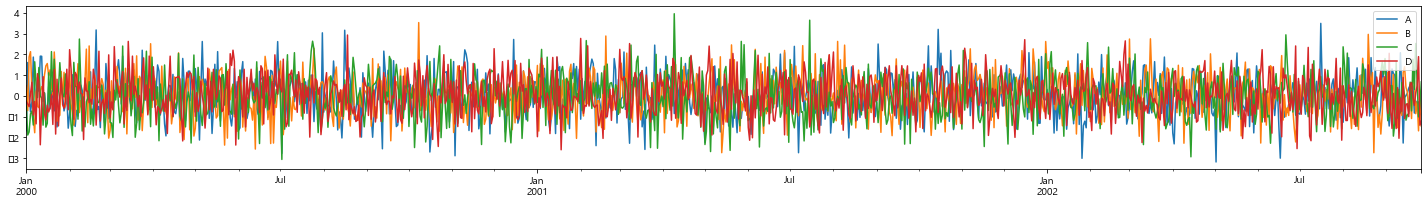

<Figure size 1800x216 with 0 Axes>

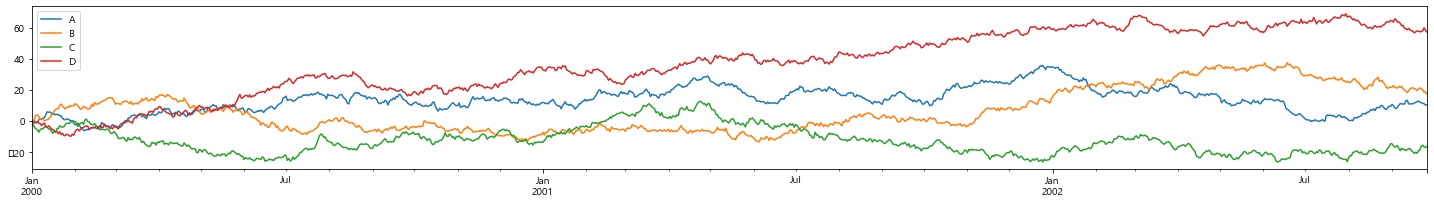

In [30]:
N = 1000
index = pd.Series(np.random.randn(N), index=pd.date_range('1/1/2000', periods =N)).index

df = pd.DataFrame(np.random.randn(N,4), index=index, columns=list('ABCD'))
df.head(3)
plt.figure()
df.plot()

df=df.cumsum()
df.head(3)
plt.figure()
df.plot()

## pandas plot - bar, 시간이 너무 걸려 데이터를 구분하여 보기

<Figure size 1800x216 with 0 Axes>

<AxesSubplot:>

<Figure size 1800x216 with 0 Axes>

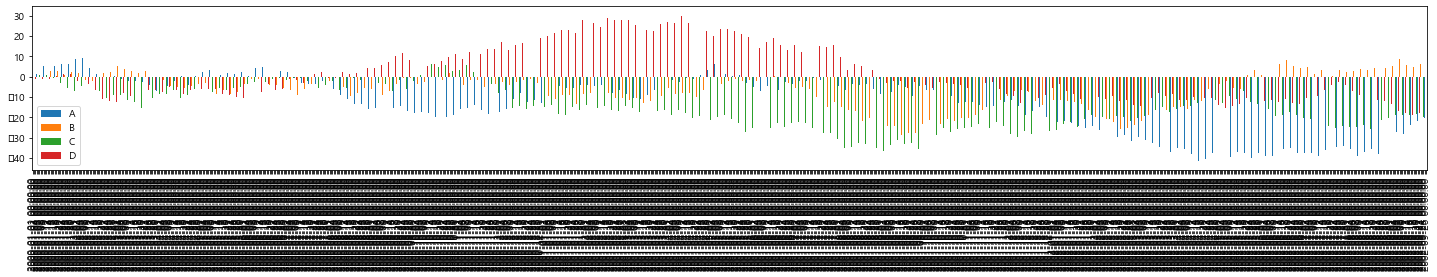

In [31]:
df = pd.DataFrame(np.random.randn(N,4), index=ts.index, columns=list('ABCD'))
df = df.cumsum()

plt.figure()
df.plot(kind='bar')

In [32]:
df.head()
df.shape
df.iloc[1]

,A,B,C,D
2000-01-01,0.325760,-0.834557,-0.775185,-0.692244
2000-01-02,1.214230,-1.060782,-1.196907,-1.134116
2000-01-03,1.926075,-0.396655,1.499771,-0.998680
2000-01-04,1.323015,0.629835,-0.256936,-3.290352
2000-01-05,2.106166,2.630180,0.122793,-0.327908


(1000, 4)

A    1.214230
B   -1.060782
C   -1.196907
D   -1.134116
Name: 2000-01-02 00:00:00, dtype: float64

<Figure size 1800x216 with 0 Axes>

<AxesSubplot:>

<Figure size 1800x216 with 0 Axes>

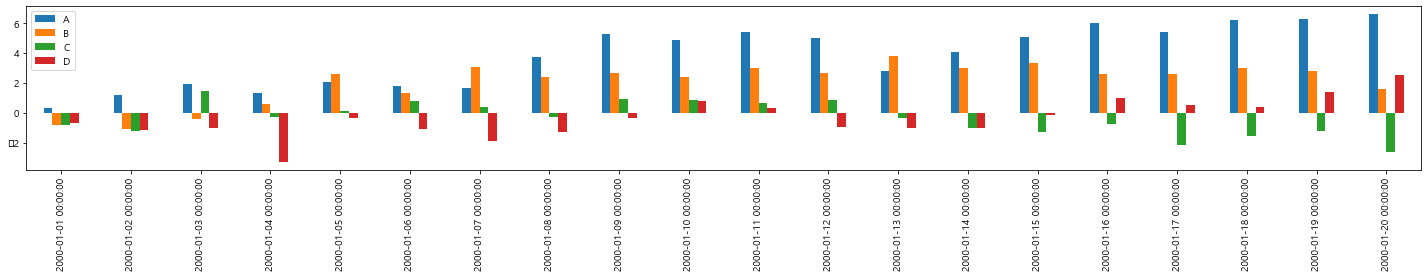

In [33]:
plt.figure()
df.iloc[0:20].plot(kind='bar')

<AxesSubplot:>

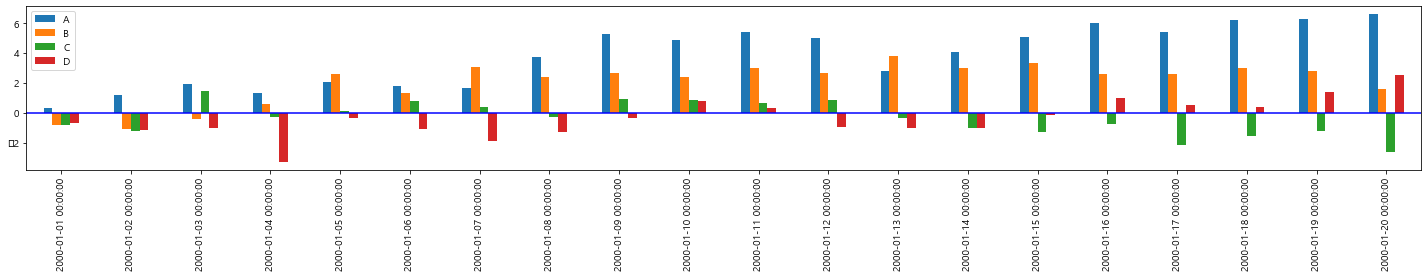

In [34]:
df.iloc[0:20].plot.bar()
plt.axhline(0, color='b')

<AxesSubplot:>

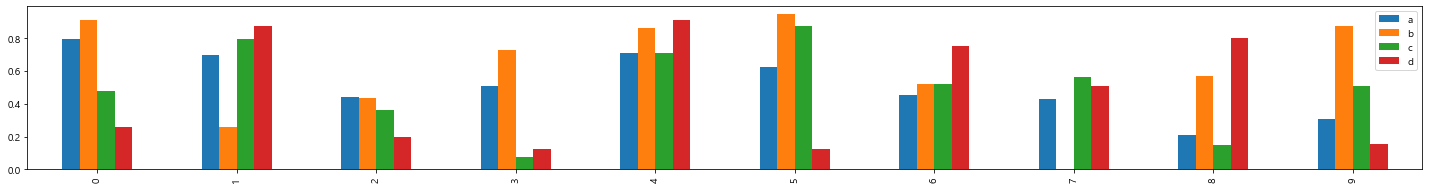

In [35]:
df = pd.DataFrame(np.random.rand(10,4), columns = ['a','b','c','d'])
df.plot.bar()

<AxesSubplot:>

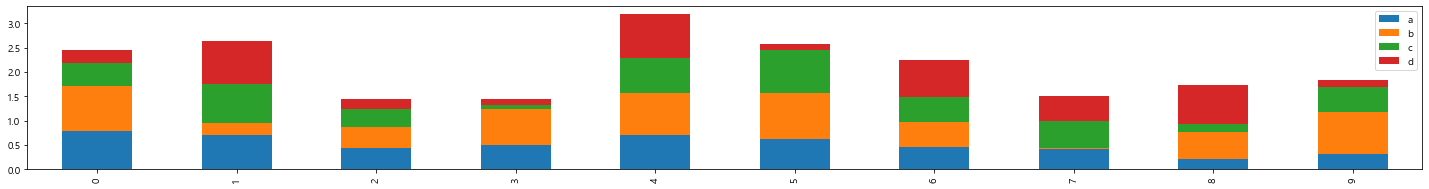

In [36]:
df.plot.bar(stacked=True)

<AxesSubplot:>

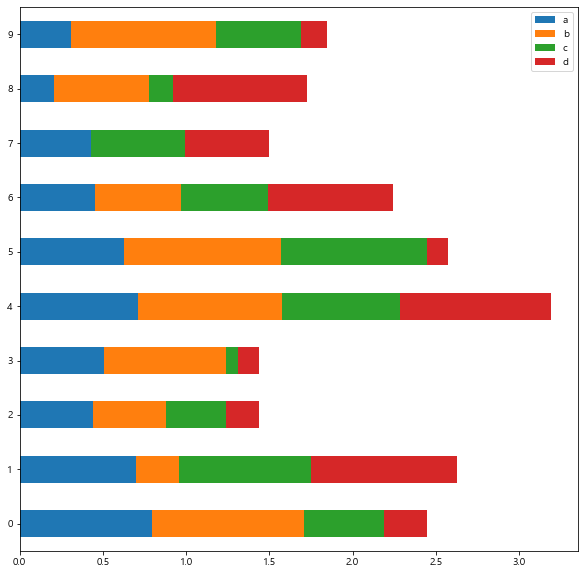

In [37]:
plt.rcParams["figure.figsize"] = (10,10)
df.plot.barh(stacked=True)

<AxesSubplot:ylabel='Frequency'>

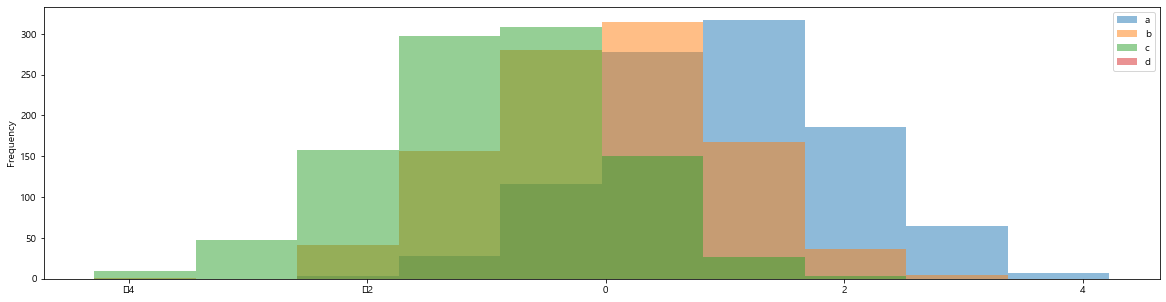

In [38]:
plt.rcParams["figure.figsize"] = (20,5)
df= pd.DataFrame({'a': np.random.randn(1000)+1,
                 'b': np.random.randn(1000),
                 'c': np.random.randn(1000)-1},
                 columns=['a', 'b', 'c', 'd'])

df.plot.hist(alpha= 0.5)

<AxesSubplot:ylabel='Frequency'>

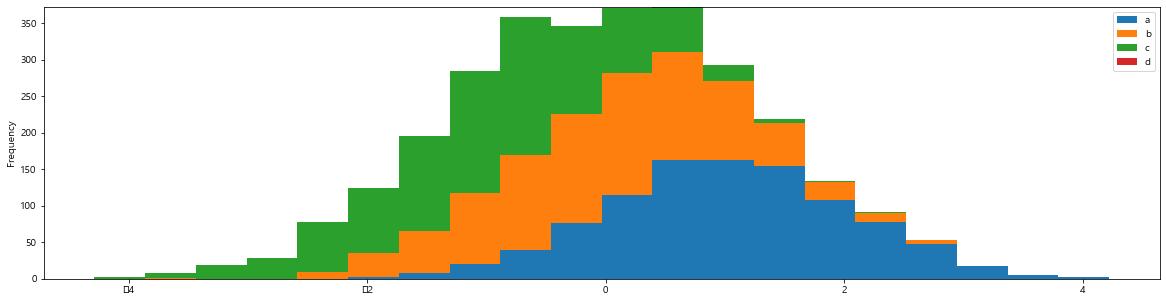

In [39]:
df.plot.hist(stacked = True, bins =20)

<AxesSubplot:ylabel='Frequency'>

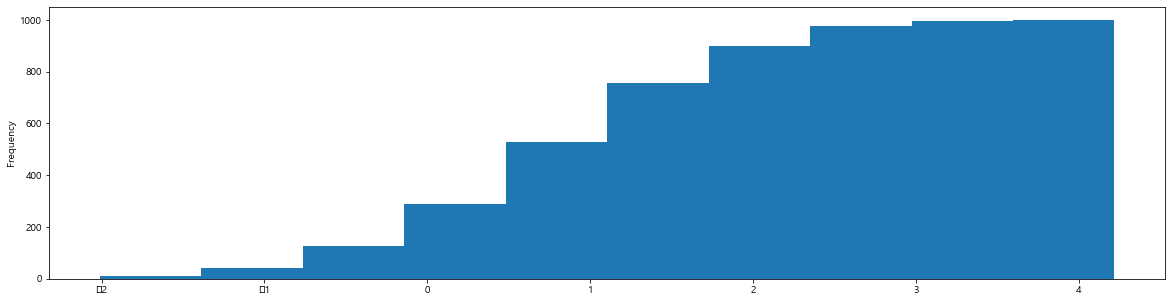

In [40]:
df['a'].plot.hist( cumulative=True)

<AxesSubplot:xlabel='Frequency'>

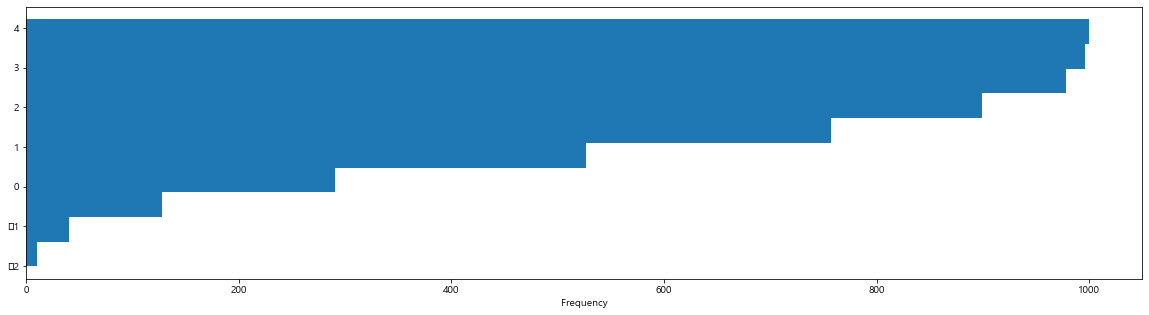

In [41]:
df['a'].plot.hist(orientation='horizontal', cumulative=True)

## pandas plot - box

In [42]:
list('ABCD')

['A', 'B', 'C', 'D']

array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>],
       [<AxesSubplot:title={'center':'2'}>,
        <AxesSubplot:title={'center':'3'}>]], dtype=object)

<AxesSubplot:>

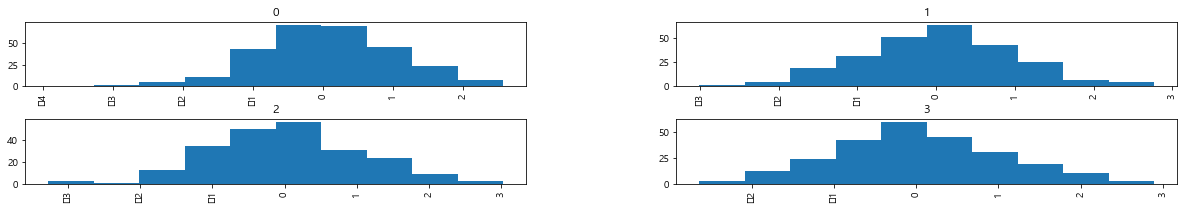

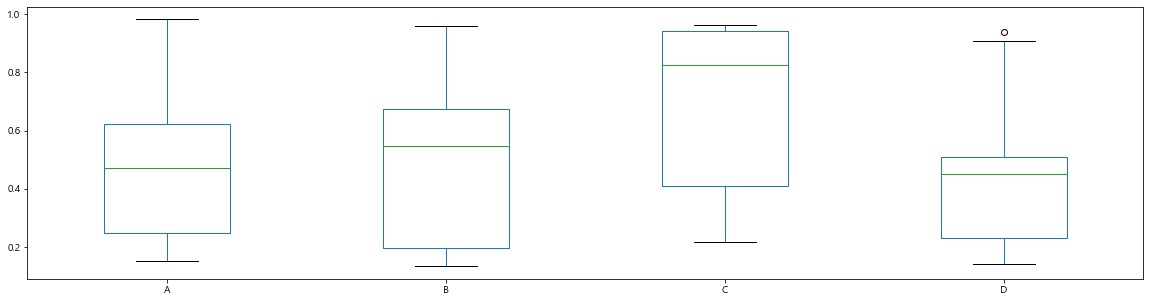

In [43]:
N =1000
df = pd.Series(np.random.randn(N))
df.hist(by =np.random.randint(0,4,N), figsize=(20,3))

df = pd.DataFrame(np.random.rand(10,4), columns=list('ABCD'))
df.plot.box()

## 실제 데이터 실습

## End